In [1]:
# Importing Needed packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import os
%matplotlib inline

In [13]:
# Reading the data

df = pd.read_csv('student_scores.csv')

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Exploration

In [14]:
# summarize the data

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
# Now, lets plot Hours vs Scores, to see how linear is their relation:

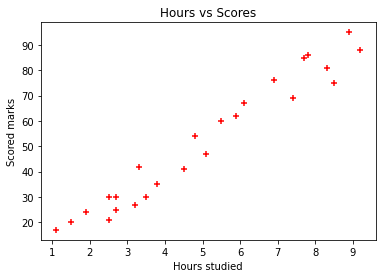

In [47]:
plt.scatter(df.Hours, df.Scores, color = 'r', marker = '+')

plt.xlabel("Hours studied")
plt.ylabel("Scored marks")
plt.title('Hours vs Scores')
plt.show()

In [49]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

# Spliting data into train and test sets


In [52]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Modeling: 

In [54]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)

# The coefficients

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [9.91065648]
Intercept:  2.0181600414346974


In [55]:
# We can plot the fit line over the data:

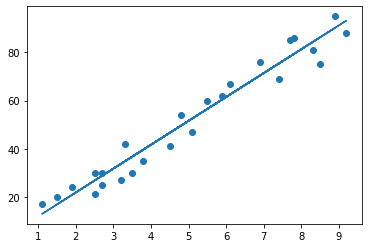

In [61]:
plt.scatter(X, y)
plt.plot(X ,regr.coef_*X+regr.intercept_ );
plt.show()

# Predictions

In [66]:
yhat = regr.predict(X_test) 

In [68]:
# Comparing Actual vs Predicted 
df = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Evaluating

In [73]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, yhat)) 

Mean Absolute Error: 4.183859899002975


In [79]:
# predicting score of a student who studied for 9.25 hrs/ day:
own_pred = regr.predict(np.array([9.25]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535
